# <center> Simulación caso de Negocio - Clustering </center>

El objetivo de esta actividad es diseñar e implementar un modelo de Clustering en Python para la resolución de un problema en el que cuenta con variables numéricas y categóricas y en el que se busca fortalecer los conocimientos teóricos y prácticos de la aplicación de las técnicas de segmentación en los negocios. 

💡 _**Nota**_: _Este material ha sido preparado por la **Universidad de las Américas - UDLA**. Parte del contenido ha sido adaptado a partir de material público liberado en [Kaggle](http://kaggle.com), [Datacamp](http://datacamp.com) y otros sitios web._

## Sobre la empresa

El siguiente caso de negocio es tomado de una e-commerce con sede en el Reino Unido conocida como **ACORA Group** especializada en la comercialización de productos de consumo masivo a través de su tienda online. La empresa cuenta con operaciones en varios países y tiene planes de expansión a nivel regional.

## 1. Evaluación de necesidades del negocio
La fase de evaluación del caso de negocio requiere que se cree, evalúe y apruebe un caso de negocio antes de proceder a las tareas reales de análisis práctico.

Uno de los desafíos que se ha planteado **ACORA Group** es segmentar sus clientes de manera que los esfuerzos comerciales de la empresa sean correctamente dirigidos en base a la misma información que genera la organización. 

# 2. Identificación de datos
La etapa de identificación de datos consiste en identificar los conjuntos de datos necesarios para el proyecto de análisis y sus fuentes.


**Dataset**

Este conjunto de datos contiene la información referente a las transacciones de compra de todas las tiendas de los 3 últimos años. 

**Diccionario de datos**

 * `InvoiceNo`: número de factura
 * `StockCode`: código del producto
 * `Description`: nombre del producto
 * `Quantity`: cantidad comprada
 * `UnitPrice`: precio unitario del producto
 * `CustomerID`: código del cliente
 * `Country`: país donde se registró la compra

# 3. Adquisición y filtrado de datos
Durante la etapa de adquisición y filtrado de datos se recopilan los datos de todas las fuentes de datos que se identificaron durante la etapa Identificación de datos.

El conjunto de datos planteado contiene información más de 150.000 transacciones de compra. Todos los datos se han recogido a través de los registros de compra realizados por todos sus clientes dentro de la página web de la e-commerce.

# 4. Extracción de datos
Durante esta etapa se debe extraer datos dispares y transformarlos en un formato que pueda facilitar el análisis de datos. 

**Importar librerías**
```Python
# Sintaxis general
import modulo as alias
- **modulo**: (módulo) librería a importar.
- **alias**: alias con el nos referiremos a la libería. 
Ejemplo: 
  - Importamos la librería pandas:
import pandas as pd
```

In [117]:
import pandas as pd

**Cargar el dataset**

```Python
Leemos un archivo usando el alias **pd**, luego punto **.**, y a seguir la función a utilizar **read_csv**.
Ejemplo:
df = pd.read_csv("data.csv")
```

In [118]:
df = pd.read_csv("/media/henryx/alldata/Maestri/maestria2/big data negocios/semana 2/data.csv", encoding= 'unicode_escape')

# 5.Validación y limpieza de datos
Los datos no válidos pueden sesgar y falsear los resultados de los análisis. La etapa de validación y depuración de datos se enfoca en establecer reglas de validación a menudo complejas y a eliminar cualquier dato no válido conocido.

**EDA - Análisis exploratorio de datos**

In [119]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Podemos apreciar que existen valores ouliers, entonces vamos a limpiar 

In [120]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.Quantity.quantile(0.25)
Q3 = df.Quantity.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Quantity'] < (Q1 - 1.5 * IQR)) |(df['Quantity'] > (Q3 + 1.5 * IQR)))]
df.shape



Q1 = df.UnitPrice.quantile(0.25)
Q3 = df.UnitPrice.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['UnitPrice'] < (Q1 - 1.5 * IQR)) |(df['UnitPrice'] > (Q3 + 1.5 * IQR)))]
df.shape

9.0
2.9000000000000004


(450820, 8)

In [121]:
df=df[df['Quantity'] >0]

<AxesSubplot:>

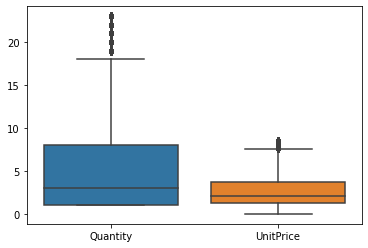

In [122]:
sns.boxplot(data= df[['Quantity','UnitPrice']] ) 

In [123]:
# Identificar el tamaño del dataset
df.size
df.shape
# 

(443573, 8)

Existe un total de 541 909 registros y en total 8 campos.

In [124]:
# Indentificar el número de transacciones
# df.groupby('InvoiceNo').value_counts()
df['InvoiceNo'].value_counts().shape
# Exite un total de 25 900 transaciones

(18475,)

Existe un total de 25 900 transanciones.


In [125]:
# Indentificar el número de productos
df['StockCode'].value_counts().shape
# Usando el codigo del producto existe un total de 4070 productos.


(3730,)

**Limpieza de datos**

InvoiceNo           0
StockCode           0
Description       430
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     117105
Country             0
dtype: int64


<AxesSubplot:>

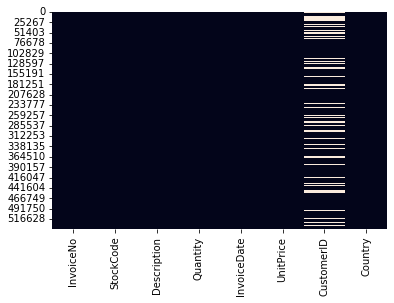

In [126]:
# Identificar si existen datos perdidos (NA, Nulls, etc.)
print(df.isnull().sum())

# 
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

Si existen datos perdidos, a perar de tener codigo el stock no tienen el nombre del producto. Eliminamos auquellos.


In [127]:
# Eliminar datos perdidos (NA, Nulls, etc.)
df = df.dropna(subset=['Description'])
df = df.dropna(subset=['CustomerID'])

**Transformación de datos**

In [128]:
# Calcular el valor total (cantidad * precio unitario)
df['total_val'] = df['UnitPrice'] * df['Quantity']
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_val
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [129]:
# Calcular el promedio y la suma del gasto total por cliente y el número de compras realizadas (agrupar por cliente)
df.groupby('CustomerID').agg(['sum', 'mean', 'count'])


/tmp/ipykernel_6568/1533201247.py:2: FutureWarning: ['StockCode', 'Description', 'InvoiceDate', 'Country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('CustomerID').agg(['sum', 'mean', 'count'])


InvoiceNo                 \
                                                          sum           mean   
CustomerID                                                                     
12347.0     5376265376265376265376265376265376265376265376...            inf   
12348.0                                                548955   5.489550e+05   
12349.0     5776095776095776095776095776095776095776095776...            inf   
12350.0     5430375430375430375430375430375430375430375430...   3.620250e+88   
12352.0     5441565441565441565441565441565441565441565441...            inf   
...                                                       ...            ...   
18280.0     5457125457125457125457125457125457125457125457...   6.063473e+52   
18281.0                        556464556464556464556464556464   1.112929e+29   
18282.0      562525562525562525562525580173580173580173580173   7.031570e+46   
18283.0     5403505403505403505403505403505403505403505403...            inf   
18287.0     5540655540655540655540655540655540655540655540...  1.678987e+196   

                 Quantity                  UnitPrice                  \
           count      sum       mean count       sum      mean count   
CustomerID                                                             
12347.0      141     1281   9.085106   141    375.34  2.661986   141   
12348.0        1       20  20.000000     1      0.85  0.850000     1   
12349.0       61      473   7.754098    61    199.06  3.263279    61   
12350.0       15      172  11.466667    15     24.45  1.630000    15   
12352.0       71      512   7.211268    71    248.51  3.500141    71   
...          ...      ...        ...   ...       ...       ...   ...   
18280.0        9       43   4.777778     9     37.70  4.188889     9   
18281.0        5       52  10.400000     5      5.46  1.092000     5   
18282.0        8       51   6.375000     8     23.85  2.981250     8   
18283.0      754     1395   1.850133   754   1195.03  1.584920   754   
18287.0       33      350  10.606061    33     68.72  2.082424    33   

           total_val                   
                 sum       mean count  
CustomerID                             
12347.0      2866.77  20.331702   141  
12348.0        17.00  17.000000     1  
12349.0      1155.75  18.946721    61  
12350.0       274.00  18.266667    15  
12352.0      1232.44  17.358310    71  
...              ...        ...   ...  
18280.0       160.70  17.855556     9  
18281.0        46.92   9.384000     5  
18282.0       113.13  14.141250     8  
18283.0      2068.98   2.744005   754  
18287.0       605.48  18.347879    33  

[4171 rows x 12 columns]

# 6. Agregación y representación de datos
La etapa de agregación y representación de datos, se dedica a integrar múltiples conjuntos de datos para obtener una visión unificada.

In [130]:
# Evaluar si se requiere integrar otros datos para el análisis. 


Como los objetivos del estudio es segmentar a los clientes entonces no existe la necesidad de incorporar nuevos campos.

# 7. Análisis de datos
La etapa de análisis de datos se enfoca en llevar a cabo la tarea de análisis propiamente dicha, que suele implicar uno o más tipos de análisis

## Implementación modelo K-means

En esta sección se debe aplicar métodos de Clustering que te permitan definir el número adecuado de grupos en los que se va a dividir los datos. Se solicita usar el **método del codo** (elbow method) y el método **análisis de la silueta**.

⚠️ **Consideraciones:** Tomar en cuenta que una mala elección del número de Clusters podría generar pocos Clusters con datos muy heterogéneos o muchos Clusters con datos muy similares.

**Método del codo (Elbow Method)**

In [131]:
df1 = df[['Quantity','UnitPrice','total_val']]
int('4')
df.shape

(326468, 9)

In [132]:
df1.info()
def tryint(a):
    if a.isnumeric():
       return True
    else:
        return False
    


<class 'pandas.core.frame.DataFrame'>
Int64Index: 326468 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Quantity   326468 non-null  int64  
 1   UnitPrice  326468 non-null  float64
 2   total_val  326468 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 10.0 MB


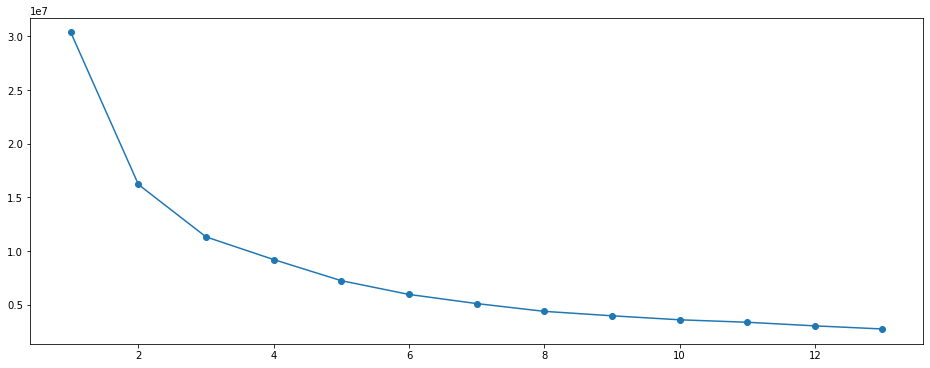

In [133]:
# Aplicar el método del codo
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters   = i, 
                    init         = 'k-means++', 
                    max_iter     = 300, 
                    n_init       = 10, 
                    random_state = 42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
    
numero_clusteres = list(enumerate(wcss, start = 1))
metrica_wcss = np.array(numero_clusteres)
df_wcss= pd.DataFrame(data = metrica_wcss, columns = ['NUM_CLUSTERS','ERROR'], index = range(2, 15))

plt.figure(figsize=(16,6))
plt.plot(df_wcss.NUM_CLUSTERS, df_wcss.ERROR, marker = "o" );

Aplicando el metodo del codo notamos que la inercia del grupo disminuye a medida que aumentamos el número de grupos. Además, la caída de la inercia es mínima después de K = 3, por lo que 3 puede considerarse como el número óptimo de grupos.

**Método de la silueta**

In [134]:
# Aplicar el método de la silueta
from sklearn.metrics import silhouette_score
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for i in range_n_clusters:
    kmeans = KMeans(n_clusters   = i, 
                    init         = 'k-means++', 
                    max_iter     = 300, 
                    n_init       = 10, 
                    random_state = 42)
    cluster_labels = kmeans.fit_predict(df1)
    silhouette_avg = silhouette_score(df1, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

KeyboardInterrupt: 

### Entrenamiento del modelo K-means

In [135]:
# Entrenamiento del modelo con el número de clústers óptimo
#El número de clústers
k=3
#Definición de parámetos del modelo
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
#Entrenamiento del modelo
etiqueta = kmeans.fit(df1)

In [136]:
# Imprimir los centroides de cada clúster

kmeans.cluster_centers_


array([[ 3.14170907,  2.1530446 ,  4.53189063],
       [12.78515894,  5.04485779, 58.26015746],
       [ 8.40963536,  2.98548411, 18.23080929]])

# 8. Visualización de datos
La capacidad de analizar grandes cantidades de datos y obtener información útil tiene poco valor si los únicos que pueden interpretar los resultados son los analistas.
La etapa de visualización de datos se dedica a utilizar técnicas y herramientas de visualización de datos para comunicar gráficamente los resultados del análisis con vistas a una interpretación eficaz por parte de los usuarios empresariales.

In [137]:
# Graficar la distribución de clientes por clúster
etiquetas = kmeans.labels_
# Agregamos al dataset la etiqueta
df1['Cluster_kmeans'] = etiquetas
df1.head()


/tmp/ipykernel_6568/2726186648.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Cluster_kmeans'] = etiquetas


,Quantity,UnitPrice,total_val,Cluster_kmeans
0,6,2.55,15.30,2
1,6,3.39,20.34,2
2,8,2.75,22.00,2
3,6,3.39,20.34,2
4,6,3.39,20.34,2


In [142]:
df1['Cluster_kmeans'].value_counts()

0    172960
2    143347
1     10161
Name: Cluster_kmeans, dtype: int64

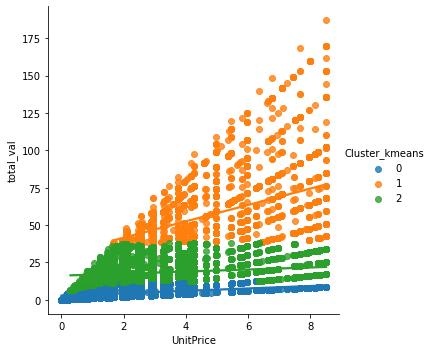

In [138]:
sns.lmplot(x = 'UnitPrice', y = 'total_val',  data = df1,
        hue = 'Cluster_kmeans')

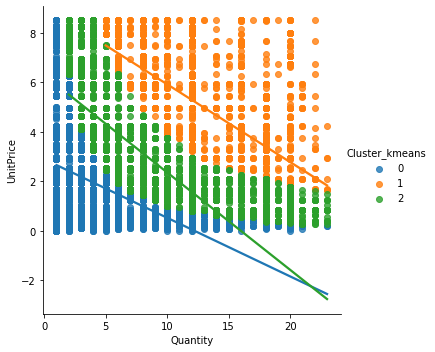

In [139]:
sns.lmplot(x = 'Quantity', y = 'UnitPrice',  data = df1,
        hue = 'Cluster_kmeans')

In [ ]:
sns.lmplot(x = 'UnitPrice', y = 'Quantity',  data = df1,
        hue = 'Cluster_kmeans')

Usando solo  3 

# 9. Utilización de los resultados del análisis
Después de que los resultados del análisis se pongan a disposición de los usuarios de negocio para apoyar la toma de decisiones empresariales, por ejemplo a través de cuadros de mando o paneles, puede haber más oportunidades para utilizar los resultados del análisis. La etapa de utilización de los resultados del análisis, esta enfocada en determinar cómo y dónde se pueden aprovechar más los datos del análisis procesado.

In [ ]:
# Haga un breve análisis de los hallazgos 


In [143]:
df1.groupby('Cluster_kmeans')['total_val'].sum()

Cluster_kmeans
0     783835.804
1     591981.460
2    2613331.820
Name: total_val, dtype: float64

Podemos observar que al excluir la identificación del cliente, hemos generado con éxito tres grupos distintos en la primera imagen que representa UnitPrice versus el Quantity. Es evidente que el grupo más grande de productos vendidos se encuentra dentro de este grupo, caracterizado por vender mas pero genar menos ingresos. El segundo clúster es similar al primero, pero menos ventas. El último grupo comprende menos ventas; sin embargo, son los que tienen precios más altos por unidad y contribuyen más a los ingresos totales. En consecuencia, este gráfico representa efectivamente la diferencia en ventas entre productos de diferentes precios. Sugiriendo que mientras menos sea el precio mas unidades se van a vender.

In [ ]:
# Qué acciones sugerería a los directivos de la empresa?


La estrategia que propongo consiste en mantener precios convenientes para productos de alto precio y ofrecer promociones en productos de bajo precio, con el objetivo de incentivar a los clientes a comprar más artículos. Este enfoque puede ser efectivo para promover la idea de que comprar más productos puede ser beneficioso. Aquí hay un desglose de los pasos que puede seguir para implementar esta estrategia:

- Analizar la cartera de productos: identificar los productos de alto precio que son esenciales para generar mayores ingresos y los productos de bajo precio que tienen el potencial de aumentar las ventas.

- Determinar el precio óptimo: Realizar estudios de mercado y analice el comportamiento del cliente para establecer puntos de precio adecuados para sus productos de alto precio. Considerar factores como los costos de producción, los precios de la competencia y la disposición a pagar del cliente. El objetivo es lograr un equilibrio entre la rentabilidad y el atractivo para los clientes.